# Introduction

In [ ]:
import mlxtend
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor ,DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error ,f1_score ,classification_report,mean_squared_error,accuracy_score #classification的true是第一个值
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge
from sklearn.ensemble import VotingClassifier,VotingRegressor,BaggingClassifier,BaggingRegressor,AdaBoostRegressor
from mlxtend.classifier import StackingClassifier
from mlxtend.regressor import StackingRegressor


In [ ]:

df=pd.read_csv('/content/sample_data/california_housing_train.csv')

y=df['median_house_value']

X=df.drop('median_house_value',axis=1)
# Split into train (80%) and test(20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the regressor
reg_dt = DecisionTreeRegressor(min_samples_leaf=3, min_samples_split=9, random_state=500)

# Fit to the training set
reg_dt.fit(X_train, y_train)

# Evaluate the performance of the model on the test set
y_pred = reg_dt.predict(X_test)
print('MAE: {:.3f}'.format(mean_absolute_error(y_test, y_pred)))

MAE: 41837.345


# Voting

In [ ]:
# Instantiate the individual models
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_lr = LogisticRegression(class_weight='balanced')
clf_dt = DecisionTreeClassifier(min_samples_leaf = 3, min_samples_split = 9, random_state=500)

# Create and fit the voting classifier
clf_vote = VotingClassifier(
    estimators=[('knn', clf_knn), ('lr', clf_lr), ('dt', clf_dt)]
)
clf_vote.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform')),
                             ('lr',
                              LogisticRegression(C=1.0, class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2'...
                              Decision

In [ ]:
# Calculate the predictions using the voting classifier
pred_vote = clf_vote.predict(X_test)

# Calculate the F1-Score of the voting classifier
score_vote = mean_absolute_error(y_test,pred_vote)
print('MAE: {:.3f}'.format(score_vote))


MAE: 112113.897


# Averaging

In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_lr = LogisticRegression(class_weight='balanced')
clf_dt = DecisionTreeClassifier(min_samples_leaf = 3, min_samples_split = 9, random_state=500)

#soft voting
clf_vote_soft = VotingClassifier(
    estimators=[('knn', clf_knn), ('lr', clf_lr), ('dt', clf_dt)],
    voting='soft',
    weights=[1,2,1]
)
clf_vote_soft.fit(X_train, y_train)

pred_vote_soft = clf_vote_soft.predict(X_test)

# Calculate the F1-Score of the voting classifier
score_vote_soft = mean_absolute_error(y_test,pred_vote_soft)
print('MAE: {:.3f}'.format(score_vote_soft))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MAE: 68378.496


# Bagging

In [ ]:
#weak model--    max_depth=3的决策树    max_iter=50,C=100的逻辑回归
#利用不同的数据集，同一种算法
# Take a sample with replacement
X_train_sample = X_train.sample(frac=1.0, replace=True, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Build a "weak" Decision Tree classifier
clf = DecisionTreeClassifier(max_depth = 4, max_features = 2, random_state=500)

# Fit the model to the training sample
clf.fit(X_train_sample,y_train_sample)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=500, splitter='best')

In [ ]:
#Using sklearn to bagging
# Build and train the Bagging classifier
clf_bag = BaggingClassifier(
  base_estimator=clf_dt,
  n_estimators=21 ,
  random_state=500)
clf_bag.fit(X_train, y_train)

# Predict the labels of the test set
pred = clf_bag.predict(X_test)


# Boosting

In [ ]:
# Build and fit an AdaBoost regressor
reg_ada = AdaBoostRegressor(n_estimators=100, learning_rate=0.01, random_state=500)
reg_ada.fit(X_train, y_train)

# Calculate the predictions on the test set
pred = reg_ada.predict(X_test)

# Evaluate the performance using the RMSE
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE: {:.3f}'.format(rmse))

RMSE: 79501.557


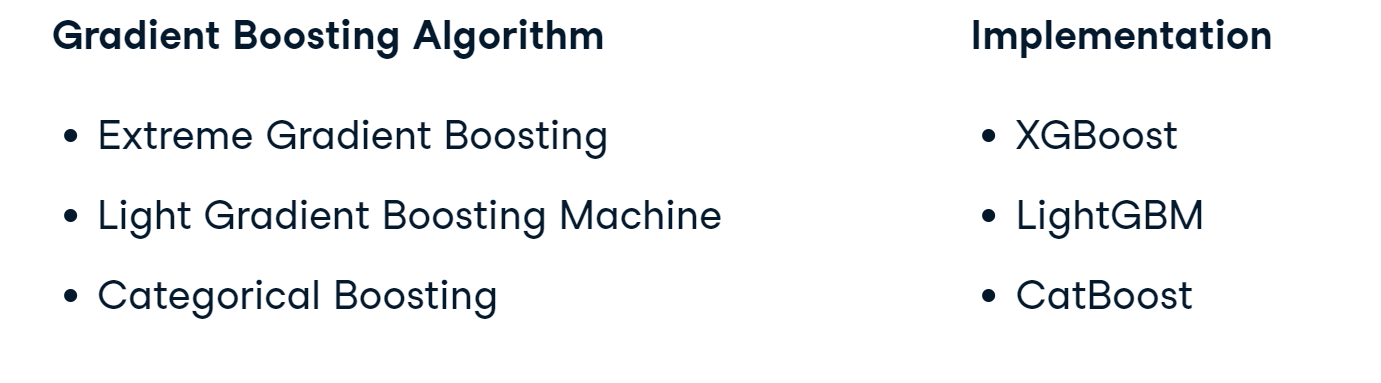

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 30 kB/s 


In [ ]:
import xgboost as xgb   #acc
import lightgbm as lgb    #speed
import catboost as cb    #combined


In [ ]:
X_train.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4679,-118.07,33.81,22.0,2711.0,352.0,1305.0,368.0,8.5407
2512,-117.63,33.50,12.0,3619.0,536.0,1506.0,492.0,7.2013
993,-117.09,32.57,17.0,444.0,83.0,357.0,87.0,5.1478
1327,-117.16,32.81,34.0,2275.0,375.0,1021.0,379.0,3.6371
4630,-118.07,34.17,36.0,2415.0,394.0,1215.0,413.0,5.5418


# Stacking

In [ ]:


# Instantiate the first-layer classifiers
clf_dt = DecisionTreeClassifier(min_samples_leaf = 3, min_samples_split = 9, random_state=500)
clf_knn = KNeighborsClassifier(n_neighbors=5,algorithm='ball_tree')

# Instantiate the second-layer meta classifier
clf_meta = DecisionTreeClassifier(random_state=500)

# Build the Stacking classifier
clf_stack = StackingClassifier(
    classifiers=[clf_dt,clf_knn],
    meta_classifier=clf_meta,
    use_features_in_secondary = True
)
clf_stack.fit(X_train,y_train)

# Evaluate the performance of the Stacking classifier
pred_stack = clf_stack.predict(X_test)
print("Accuracy: {:0.4f}".format(accuracy_score(y_test, pred_stack)))

#just for fun!

Accuracy: 0.0241


In [ ]:
# Instantiate the 1st-layer regressors
reg_dt = DecisionTreeRegressor(min_samples_leaf = 11, min_samples_split = 33, random_state=500)
reg_lr = LinearRegression(normalize=True)
reg_ridge = Ridge(random_state = 500)

# Instantiate the 2nd-layer regressor
reg_meta = LinearRegression()

# Build the Stacking regressor
reg_stack = StackingRegressor(
    regressors=[reg_dt,reg_lr,reg_ridge],
    meta_regressor=reg_meta
)
reg_stack.fit(X_train,y_train)

# Evaluate the performance on the test set using the MAE metric
pred = reg_stack.predict(X_test)
print('MAE: {:.3f}'.format(mean_absolute_error(y_test, pred)))

MAE: 39937.690


# Congrats(彩蛋）

(68, 2)


First 10 landmarks:
 [[130 313]
 [134 350]
 [139 388]
 [149 424]
 [168 455]
 [194 483]
 [224 507]
 [255 527]
 [289 532]
 [323 527]]


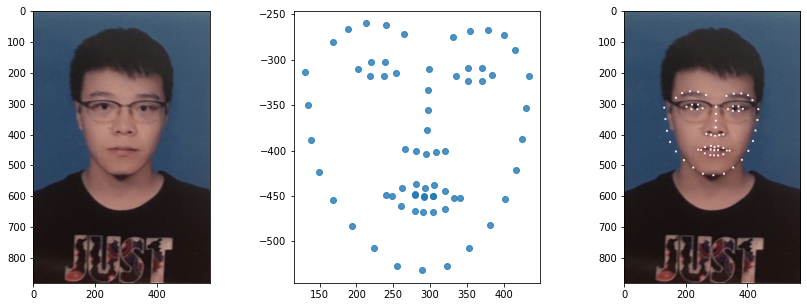

In [ ]:
import imageio
import matplotlib.pyplot as plt


from mlxtend.image import extract_face_landmarks

img = imageio.imread('/content/test-face.png')
landmarks = extract_face_landmarks(img)
print(landmarks.shape)
print('\n\nFirst 10 landmarks:\n', landmarks[:10])

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(img)
ax = fig.add_subplot(1, 3, 2)
ax.scatter(landmarks[:, 0], -landmarks[:, 1], alpha=0.8)
ax = fig.add_subplot(1, 3, 3)
img2 = img.copy()

for p in landmarks:
    img2[p[1]-3:p[1]+3, p[0]-3:p[0]+3, :] = (255, 255, 255)
    # note that the values -3 and +3 will make the landmarks
    # overlayed on the image 6 pixels wide; depending on the
    # resolution of the face image, you may want to change
    # this value

ax.imshow(img2)
plt.show()